In [28]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('data/schools.csv')
data.head()

,School ID,School Name,Street Address,City,State,ZIP Code,Phone Number,School State ID,School Level,Lowest Grade,Highest Grade,Latitude,Longitude,School Website,Cluster,Mapped Location
0,496,A. Z. Kelley Elementary,5834 Pettus Road,Antioch,TN,37013,(615)941-7535,1,Elementary School,Grade P3,Grade 4,36.021817,-86.658848,http://schools.mnps.org/az-kelley-elementary-s...,Cane Ridge,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,3921 Lloyd Road,Whites Creek,TN,37189,(615)876-5105,5,Elementary School,Grade P4,Grade 4,36.252961,-86.832229,http://schools.mnps.org/alex-green-elementary-...,Whites Creek,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,319 Anderson Lane,Madison,TN,37115,(615)612-3678,10,Elementary School,Grade P3,Grade 4,36.273766,-86.703832,http://schools.mnps.org/amqui-elementary-school,Hunters Lane,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,110 Shute Ln,Old Hickory,TN,37138,(615)847-7317,15,Elementary School,Grade P4,Grade 4,36.231585,-86.623775,http://schools.mnps.org/andrew-jackson-element...,McGavock,"(36.23158465, -86.62377469)"
4,110,Antioch High School,1900 Hobson Pike,Antioch,TN,37013,(615)641-5400,20,High School,Grade 9,Grade 12,36.046675,-86.599418,http://schools.mnps.org/antioch-high-school,Antioch,"(36.04667464, -86.59941833)"


In [20]:
data = data[['School ID', 'School Name', 'Mapped Location']]
data.head()

,School ID,School Name,Mapped Location
0,496,A. Z. Kelley Elementary,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,"(36.23158465, -86.62377469)"
4,110,Antioch High School,"(36.04667464, -86.59941833)"


In [21]:
df = data.rename(columns={'School ID':'StopID', 'School Name':'StopName', 'Mapped Location':'Location'})
df.head()

,StopID,StopName,Location
0,496,A. Z. Kelley Elementary,"(36.02181712, -86.65884778)"
1,375,Alex Green Elementary,"(36.2529607, -86.8322292)"
2,105,Amqui Elementary,"(36.27376585, -86.70383153)"
3,460,Andrew Jackson Elementary,"(36.23158465, -86.62377469)"
4,110,Antioch High School,"(36.04667464, -86.59941833)"


### Extracting longitude and latitude

In [27]:
c=0
for loc in df.Location:
    loc = ast.literal_eval(str(loc))
    c+=1
    if c==10:
        break
    print(type(loc), loc)

<class 'tuple'> (36.02181712, -86.65884778)
<class 'tuple'> (36.2529607, -86.8322292)
<class 'tuple'> (36.27376585, -86.70383153)
<class 'tuple'> (36.23158465, -86.62377469)
<class 'tuple'> (36.04667464, -86.59941833)
<class 'tuple'> (36.05537897, -86.67182989)
<class 'tuple'> (36.06687798, -86.66406971)
<class 'tuple'> (36.07074879, -86.93482036)
<class 'tuple'> (36.26968766, -86.76230026)


In [25]:
# extract latitude to a new column: lat
df['lat'] = [ast.literal_eval(str(loc))[0] for loc in df.Location]

# extract longitude to a new column: lng
df['lng'] = [ast.literal_eval(str(loc))[1] for loc in df.Location]

# print the first few rows of df again
df.head()

,StopID,StopName,Location,lat,lng
0,496,A. Z. Kelley Elementary,"(36.02181712, -86.65884778)",36.021817,-86.658848
1,375,Alex Green Elementary,"(36.2529607, -86.8322292)",36.252961,-86.832229
2,105,Amqui Elementary,"(36.27376585, -86.70383153)",36.273766,-86.703832
3,460,Andrew Jackson Elementary,"(36.23158465, -86.62377469)",36.231585,-86.623775
4,110,Antioch High School,"(36.04667464, -86.59941833)",36.046675,-86.599418


### Plotting chicken locations
- create a scatterplot that shows where the Nashville chickens are!

In [29]:
chickens = pd.read_csv('data/Domesticated_Hen_Permits_clean_adjusted_lat_lng.csv')
chickens.head()

,Unnamed: 0,permit,city,state,zip,district,date_issued,lat,lng
0,0,288.0,Nashville,TN,37211,30.0,11/26/2014,36.029132,-86.724578
1,1,435.0,Nashville,TN,37211,19.0,05/18/2015,36.069132,-86.754578
2,2,270.0,Nashville,TN,37216,7.0,11/20/2014,36.236134,-86.711204
3,3,249.0,Nashville,TN,37216,25.0,12/29/2014,36.246134,-86.751204
4,4,200.0,Nashville,TN,37221,22.0,12/10/2014,36.029367,-86.935290


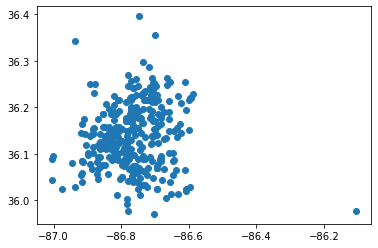

In [30]:
# Plot the locations of all Nashville chicken permits
plt.scatter(x = chickens.lng, y = chickens.lat)

- We can see the relative location of the Nashville chickens using longitude for the x-axis and latitude for the y-axis. 

### Creating a GeoDataFrame & examining the geometry

In [ ]:
# Import geopandas
import geopandas as gpd 
import matplotlib.pyplot as plt

# Read in the services district shapefile and look at the first few rows.
service_district = gpd.read_file(shapefile_path)
print(service_district.head())

# Print the contents of the service districts geometry in the first row
print(service_district.loc[0, 'geometry'])

- The geometry field holds a series of latitude/longitude pairs that define the border of a polygon. Printing a geometry field gives all of the latitude/longitude pairs that make up the polygon boundary.

### Plotting shapefile polygons
- The next step is to show the map of polygons.

In [ ]:
# Plot the Service Districts without any additional arguments
service_district.plot()
plt.show()

# Plot the Service Districts, color them according to name, and show a legend
service_district.plot(column = 'name', legend = True)
plt.show()

### Plotting points over polygons

In [ ]:
# Plot the service district shapefile
service_district.plot(column="name")

# Add the chicken locations
plt.scatter(x=chickens['lng'], y=chickens['lat'], c = 'black')

# Show the plot
plt.show()

In [ ]:
# Plot the service district shapefile
service_district.plot(column='name', legend=True)

# Add the chicken locations
plt.scatter(x=chickens['lng'], y=chickens['lat'], c='black', edgecolor = 'white')


# Add labels and title
plt.title('Nashville Chicken Permits')
plt.xlabel('longitude')
plt.ylabel('latitude')

# Add grid lines and show the plot
plt.grid()
plt.show()